In [35]:
# from comet_ml import Experiment

# Run your code and go to /

import torch
t = torch
from torch import nn, optim
import matplotlib.pyplot as plt

import gin
from PIL import Image
import requests
import torchvision
tv = torchvision
from torchvision import transforms
import einops

In [36]:
# img_data = requests.get("https://d1iczm3wxxz9zd.cloudfront.net/971e55cc-128e-4809-bb05-2adf7b0238ec/000000-0000000000/39127110424036069919666352160427857710300904072429089980813045768686488932997/ITEM_PREVIEW1.jpg").content
# with open('pineapple.jpg', 'wb') as handler:
#     handler.write(img_data)

In [61]:
def imshow(img, figsize=(6, 6)):
    # img is three or four dimensional with size-1 dim 0
    img = torch.Tensor(img)
    if img.requires_grad:
        img = img.detach()
    plt.figure(figsize=figsize)
    if len(img.size()) == 4:
        im = img[0]
    else:
        im = img
    if im.size()[0] == 3:
        im = einops.rearrange(im, 'a b c->b c a')
    plt.imshow(im)

torch.Size([3, 1920, 1920])


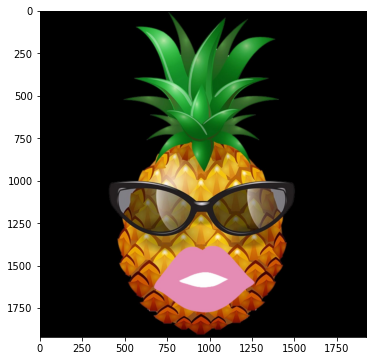

In [38]:
im = Image.open('pineapple.jpg')
im_tensor = transforms.ToTensor()(im)
print(im_tensor.size())
imshow(im_tensor)

In [66]:
resnet = torchvision.models.resnet34(pretrained=True)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [106]:
from tqdm import tqdm

class ImageModule(t.nn.Module):

    def __init__(self):
        super().__init__()

        # self.img =  nn.Parameter(t.rand((1,3,224,244)))
        self.img =  nn.Parameter(t.randn((1,3,224,244)))

        self.transform = nn.Sequential(
            transforms.ColorJitter(.02, .02, .02, .02),
            transforms.RandomAffine(10, translate=(1/10,1/10), scale=(.9,1.1))
        )


    def forward(self, transform=False):
        img = t.sigmoid(self.img)
        img = self.transform(img) if transform else img
        return img

    def show_img(self):
        imshow(self.forward(transform=False).cpu())

    def get_img(self):
        return self.img

img = ImageModule()
img.to("cuda")
resnet.to("cuda")

def optimize_image(img, epochs):
    optimizer = torch.optim.Adam(img.parameters(), lr=0.05)
    pbar = tqdm(range(epochs))
    for i in pbar:
        optimizer.zero_grad()
        out = resnet(img(True))[0,50]
        loss = -out
        loss.backward()
        if i % 10 == 0:
            pbar.set_description(f'loss={loss.item():.2}')
        optimizer.step()


# out = model(img.get_img().reshape((1,)+img.get_img().shape))

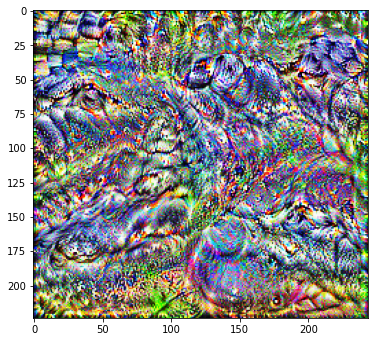

loss=-1.2e+02: 100%|██████████| 2000/2000 [00:52<00:00, 37.94it/s]


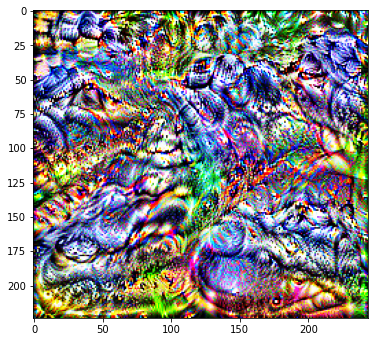

In [108]:
img.show_img()
plt.show()

optimize_image(img, 2000)

img.show_img()